[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0.6666666666666667 1.1102230246251565e-16


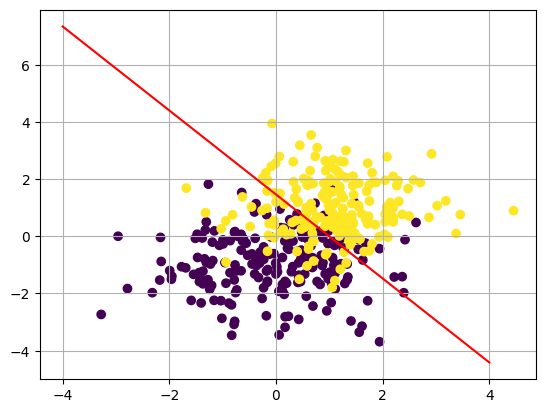

0.6666666666666667 1.1102230246251565e-16


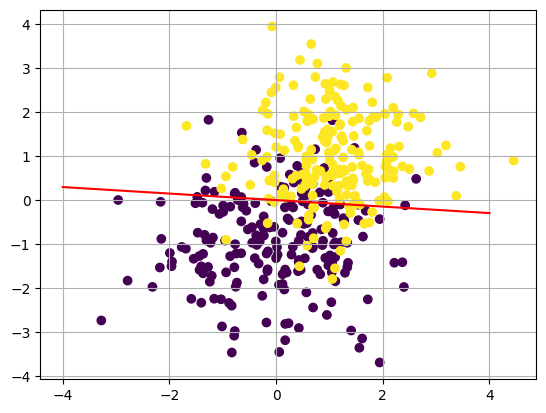

0.8181818181818181 1.1102230246251565e-16


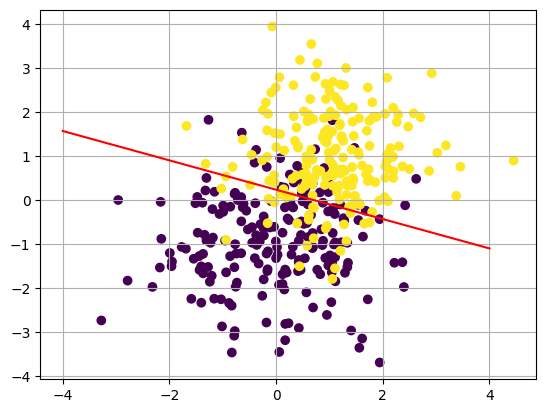

0.7727272727272727 0.0


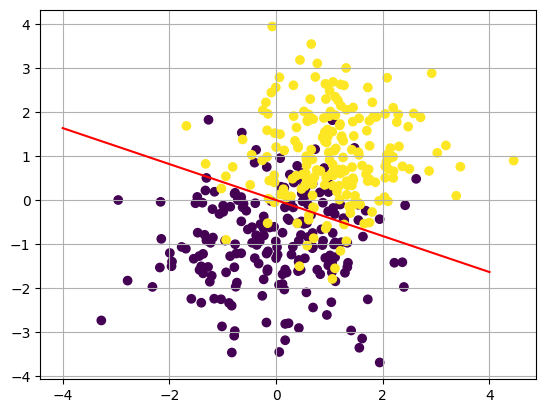

0.5223880597014926 1.1102230246251565e-16


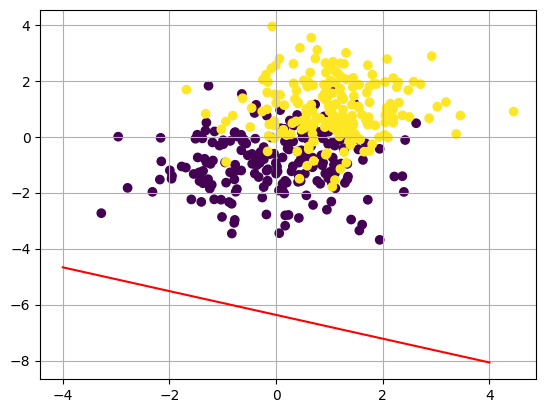

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, KFold

#1

#np.random.seed(0)

class1_points=np.random.multivariate_normal([0,-1],[[1,0],[0,1]],200)
class2_points=np.random.multivariate_normal([1,1],[[1,0],[0,1]],200)

N = [2, 5, 10, 20, 100]

class_1_2_points=np.concatenate((class1_points,class2_points))
class_1_2_points

class1_labels=np.zeros(200)
class2_labels=np.ones(200)

class_1_2_labels=np.concatenate((class1_labels,class2_labels))

class_1_2_points

scores=np.zeros((len(N),10))
print(scores)
it=0
for n in N:
  for i in range(10):
    class_1_2_points_train, class_1_2_points_test, class_1_2_labels_train, class_1_2_labels_test=train_test_split(class_1_2_points, class_1_2_labels, test_size=n/(400-n),random_state=42)
    classifier = Perceptron(tol=1e-3, max_iter = 20)
    classifier.fit(class_1_2_points_train,class_1_2_labels_train)
    scores[it][i]=(classifier.score(class_1_2_points_test,class_1_2_labels_test))
  print(scores[it].mean(), scores[it].std())
  it+=1

  x1 = np.linspace(-4,4,100)
  x2 = -(1./classifier.coef_[0][1])*(classifier.coef_[0][0]*x1+classifier.intercept_[0])
  plt.plot(x1,x2,'-r')
  plt.scatter(class_1_2_points[:,0], class_1_2_points[:,1], c=class_1_2_labels)
  plt.grid(True)
  plt.show()






Możemy zaobserwować, iż w każdej iteracji odchylenie standardowe jest niewielkie, gdyż liczba punktów jest mała. Na każdym wykresie linia rozdziela zbiory plus minus w połowie


In [ ]:
#2
iris=load_iris()
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
perceptron_layer=Perceptron(tol=1e-3, max_iter = 30)
perceptron_layer.fit(X_train,y_train)
score=perceptron_layer.score(X_test,y_test)
y_pred=perceptron_layer.predict(X_test)

conf_matrix=confusion_matrix(y_test,y_pred)
score, conf_matrix

(0.5666666666666667,
 array([[8, 0, 0],
        [8, 0, 5],
        [0, 0, 9]]))

Wszystkie 11 próbek klasy 0 zostały poprawnie sklasyfikowane jako klasa 0.
10 próbek klasy 1 zostało poprawnie sklasyfikowane, a jedna próbka klasy 1 została błędnie sklasyfikowana jako klasa 2.
Wszystkie 8 próbek klasy 2 zostały poprawnie sklasyfikowane. Podczas testowania zaobserwowano, iż czasami pojawia się 0 w środku diagonali dla macierzy pomyłek. Oznacza to, iz klasa 2 została wówczas całkowicie źle sklasyfikowana. Może to wynikać z dużego szumu w danych i liniowej nieseparowalności. Natomiast generalnie model ten dobrze radzi sobie z klasyfikacją. Zbiór danych Iris składa się z trzech klas, z których dwie nie są liniowo separowalne. To znaczy, nie istnieje hiperpłaszczyzna, która mogłaby całkowicie oddzielić wszystkie trzy klasy irysów na podstawie dostępnych cech. Z tego powodu największa trafność (dokładność klasyfikacji), jaką pojedyncza warstwa perceptronów może osiągnąć w zadaniu klasyfikacji zbioru Iris, jest ograniczona i nie przekroczy 80%.

In [ ]:
#3
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

perceptron_layer = Perceptron(tol=1e-3, max_iter=30)
perceptron_layer.fit(X_train, y_train)

score = perceptron_layer.score(X_test, y_test)
y_pred = perceptron_layer.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(score, conf_matrix)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores_kfold = []

for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X[train_index], X[test_index]
    y_train_kf, y_test_kf = y[train_index], y[test_index]

    perceptron_layer_kf = Perceptron(tol=1e-3, max_iter=30)
    perceptron_layer_kf.fit(X_train_kf, y_train_kf)

    score_kf = perceptron_layer_kf.score(X_test_kf, y_test_kf)
    print(score_kf)

    scores_kfold.append(score_kf)


0.8 [[10  0  0]
 [ 4  4  2]
 [ 0  0 10]]
0.4
0.5333333333333333
0.9
0.8666666666666667
0.8666666666666667


Możemy zaobserwować, że różne metody dają nieco odmienne wyniki klasyfikacji, natomiast jeśli zbiór zostanie podzielony poprawnie i proporcje nie zostaną zaburzone, bedzie to satysfakcjonujący wynik na poziomie 80%.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

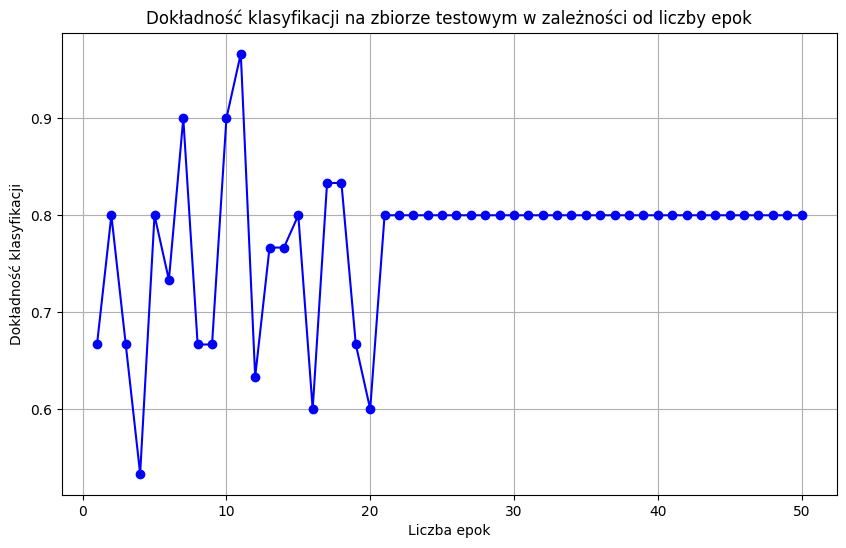

In [ ]:
epochs = range(1, 51)
scores = []

for epoch in epochs:
    perceptron = Perceptron(max_iter=epoch, early_stopping=False)
    perceptron.fit(X_train, y_train)
    scores.append(perceptron.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(epochs, scores, marker='o', linestyle='-', color='blue')
plt.title('Dokładność klasyfikacji na zbiorze testowym w zależności od liczby epok')
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność klasyfikacji')
plt.grid(True)
plt.show()

Możemy zaobserwować, że liczba epok ma istotny wpływ na dokładność klasyfikacji. Mniej więcej od liczby 10 epok wynik klasyfikacji sie stabilizuje, a przy mniejszych wartościach fluktuuje. Im większa liczba epok, tym dokładniejsza klasyfikacja.